### Exploratory Data Analysis

Roles to explore:

In [1]:
#importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from datasets import load_dataset

#loading dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

C:\Users\Akkju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Data Cleaning

df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) #coverting to datetime format

def clean_list(skills_list): #function to change the job skills from string to list format
    if pd.notna(skills_list):
        return ast.literal_eval(skills_list)
    
df['job_skills'] = df['job_skills'].apply(clean_list) #applying the function

## Filtering for United States Data Analyst Roles

In [11]:
df_DA_US = df[(df['job_country']=='United States')& (df['job_title_short']=='Data Analyst')]

#### Job Locations in US:

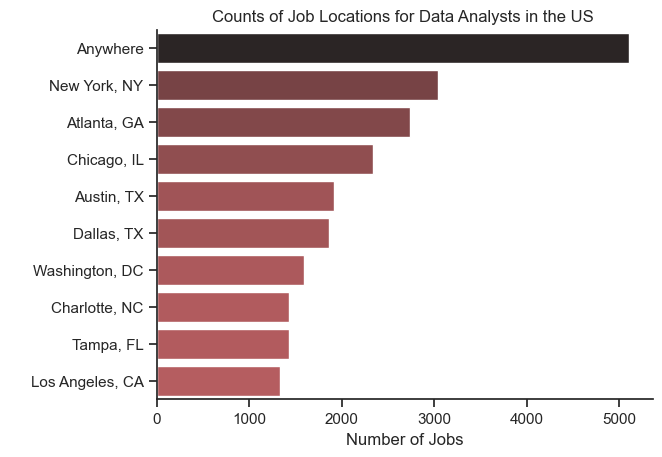

In [39]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x='count',y='job_location', hue='count', palette='dark:r_r',legend=False)
sns.despine() #Removes border
plt.title('Counts of Job Locations for Data Analysts in the US ')
plt.xlabel("Number of Jobs")
plt.ylabel(' ')
plt.show()

#### Job Opportunities:

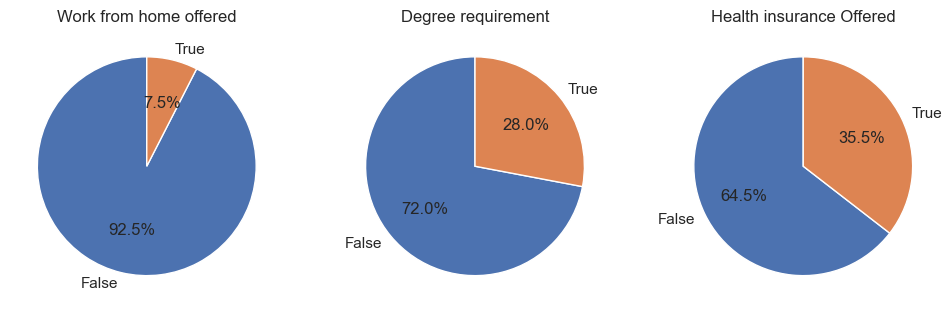

In [35]:
dict_column = {
    'job_work_from_home':'Work from home offered',
    'job_no_degree_mention':'Degree requirement',
    'job_health_insurance':'Health insurance Offered'
}

fig, ax =plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels =['False','True'], autopct ='%1.1f%%', startangle = 90)
    ax[i].set_title(title)

plt.show()

#### Companies to Explore in US:

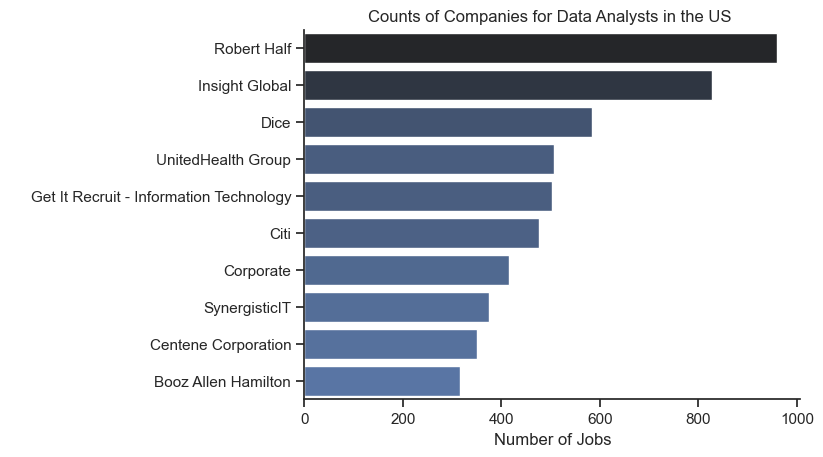

In [40]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x='count',y='company_name', hue='count', palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analysts in the US ')
plt.ylabel(' ')
plt.xlabel('Number of Jobs')
plt.show()

## Countries to Explore for Data Analyst Roles:

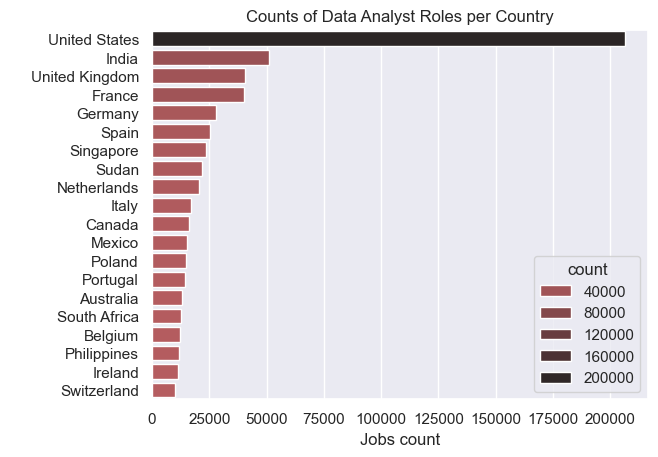

In [66]:
df_plot = df['job_country'].value_counts().head(20).to_frame()
sns.set_theme(style='darkgrid')
sns.barplot(data=df_plot, y='job_country',x='count', hue ='count',palette='dark:r_r')
plt.xlabel("Jobs count")
plt.ylabel(' ')
plt.title('Counts of Data Analyst Roles per Country')
plt.show()

## Filtering to Sri Lanka 


#### Job postings count in Sri Lanka

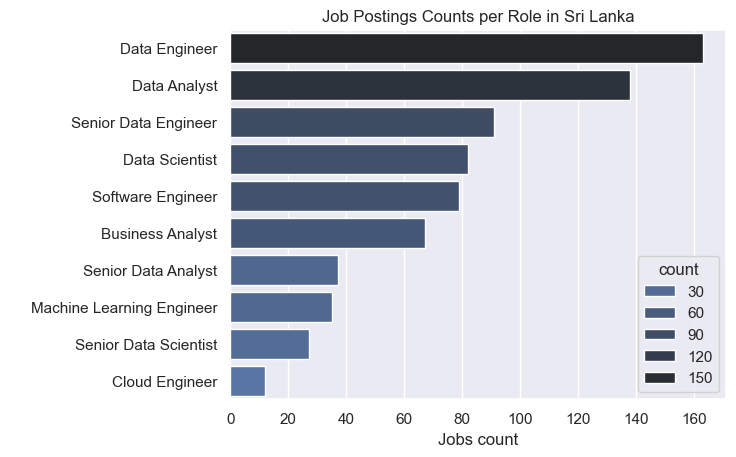

In [65]:
df_SL = df[df['job_country']=='Sri Lanka']
df_plot = df_SL['job_title_short'].value_counts().head(10).to_frame()

sns.barplot(data=df_plot, y='job_title_short', x='count',hue='count',palette='dark:b_r')
plt.ylabel(" ")
plt.xlabel("Jobs count")
plt.title('Job Postings Counts per Role in Sri Lanka')
plt.show()


#### Companies to Explore in Sri Lanka

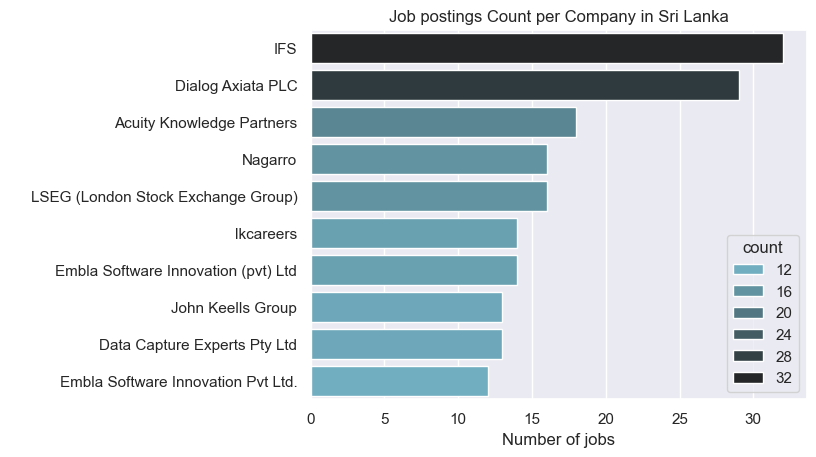

In [71]:
df_plot = df_SL['company_name'].value_counts().head(10).to_frame()
sns.barplot(data = df_plot, y='company_name', x='count',hue='count',palette='dark:c_r')
plt.xlabel('Number of jobs')
plt.ylabel(' ')
plt.title('Job postings Count per Company in Sri Lanka')
plt.show()